In [15]:
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('데이터셋/감염병 환자 입원비율/CD122300070001/TB_LM_HOSP_RATE_S.csv',encoding='cp949')

In [3]:
df

,sqno,strd_yr,stdmt,stty_infcd_tpcd,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,adm_ptnt_rate
0,6665,2022,12,3,일본뇌염,3,0,0.0
1,6840,2023,3,2,급성 복막염,24,0,0.0
2,6966,2023,6,2,결핵성 장염(K93.0*),3,0,0.0
3,5883,2021,10,2,수막결핵종(G07*),1,0,0.0
4,5582,2021,1,4,간흡충증,2,0,0.0
...,...,...,...,...,...,...,...,...
1748,5302,2020,2,4,항문생식기의(성병성) 사마귀,1,0,0.0
1749,5303,2020,3,1,바이러스가 확인되지 않은 코로나바이러스 질환 2019 [바이러스가 확인되지 않은 코...,1,0,0.0
1750,5304,2020,3,1,바이러스가 확인된 코로나바이러스 질환 2019 [바이러스가 확인된 코로나-19],16,0,0.0
1751,5552,2020,12,3,큐열,2,0,0.0


일련번호	SQNO

기준연도	STRD_YR

기준월	STDMT

법정감염병구분코드	STTY_INFCD_TPCD

진단명	DIAG_NM

전체환자수	WHOL_PTNT_CNT

입원환자수	ADM_PTNT_CNT

입원환자비율	ADM_PTNT_RATE


제1급감염병 (17종) 생물테러감염병 또는 치명률이 높거나 집단 발생 우려가 커서 발생 또는 유행 즉시 신고하고 음압격리가 필요한 감염병

제2급감염병 (21종) 전파가능성을 고려하여 발생 또는 유행시 24시간 이내에 신고하고 격리가 필요한 감염병

제3급감염병 (26종) 발생 또는 유행 시 24시간 이내에 신고하고 발생을 계속 감시할 필요가 있는 감염병

제4급감염병 (23종) 제1급~제3급 감염병 외에 유행 여부를 조사하기 위해 표본감시 활동이 필요한 감염병

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sqno             1753 non-null   int64  
 1   strd_yr          1753 non-null   int64  
 2   stdmt            1753 non-null   int64  
 3   stty_infcd_tpcd  1753 non-null   int64  
 4   diag_nm          1753 non-null   object 
 5   whol_ptnt_cnt    1753 non-null   int64  
 6   adm_ptnt_cnt     1753 non-null   int64  
 7   adm_ptnt_rate    1753 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 109.7+ KB


### 시간 컬럼 타입 변경

In [6]:
df['strd_yr_o'] = df['strd_yr'].astype('object')
df['stdmt_o'] = df['stdmt'].astype('object')
df['date'] = df['strd_yr_o'].map(str) + " " + df['stdmt_o'].map(str)

df['date'] = pd.to_datetime(df['date'])
df

,sqno,strd_yr,stdmt,stty_infcd_tpcd,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,adm_ptnt_rate,strd_yr_o,stdmt_o,date
0,6665,2022,12,3,일본뇌염,3,0,0.0,2022,12,2022-12-01
1,6840,2023,3,2,급성 복막염,24,0,0.0,2023,3,2023-03-01
2,6966,2023,6,2,결핵성 장염(K93.0*),3,0,0.0,2023,6,2023-06-01
3,5883,2021,10,2,수막결핵종(G07*),1,0,0.0,2021,10,2021-10-01
4,5582,2021,1,4,간흡충증,2,0,0.0,2021,1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
1748,5302,2020,2,4,항문생식기의(성병성) 사마귀,1,0,0.0,2020,2,2020-02-01
1749,5303,2020,3,1,바이러스가 확인되지 않은 코로나바이러스 질환 2019 [바이러스가 확인되지 않은 코...,1,0,0.0,2020,3,2020-03-01
1750,5304,2020,3,1,바이러스가 확인된 코로나바이러스 질환 2019 [바이러스가 확인된 코로나-19],16,0,0.0,2020,3,2020-03-01
1751,5552,2020,12,3,큐열,2,0,0.0,2020,12,2020-12-01


### 시간별 법정감염병코드로 진단명, 전체 환자수, 입원 환자수 총 합

In [20]:
pd.set_option('display.max_rows', None)
df_count_clean = pd.DataFrame(df.groupby(['date','stty_infcd_tpcd']).agg({'diag_nm':'count','whol_ptnt_cnt':'sum','adm_ptnt_cnt':'sum'})).reset_index()
df_count_clean['rate'] = df_count_clean['adm_ptnt_cnt']/df_count_clean['whol_ptnt_cnt']
df_count_clean

,date,stty_infcd_tpcd,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,rate
0,2020-01-01,2,8,15,0,0.000000
1,2020-01-01,3,5,15,0,0.000000
2,2020-01-01,4,6,25,0,0.000000
3,2020-02-01,1,1,11,0,0.000000
4,2020-02-01,2,14,20,1,0.050000
5,2020-02-01,3,3,24,0,0.000000
6,2020-02-01,4,6,10,0,0.000000
7,2020-03-01,1,3,19,0,0.000000
8,2020-03-01,2,9,25,1,0.040000
9,2020-03-01,3,4,31,1,0.032258


In [12]:
# 분석 편의성을 위해 연도와 월을 분리
df_count_clean['year']= df_count_clean['date'].dt.year
df_count_clean['month']= df_count_clean['date'].dt.month
df_count_clean

,date,stty_infcd_tpcd,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,year,month
0,2020-01-01,2,8,15,0,2020,1
1,2020-01-01,3,5,15,0,2020,1
2,2020-01-01,4,6,25,0,2020,1
3,2020-02-01,1,1,11,0,2020,2
4,2020-02-01,2,14,20,1,2020,2
5,2020-02-01,3,3,24,0,2020,2
6,2020-02-01,4,6,10,0,2020,2
7,2020-03-01,1,3,19,0,2020,3
8,2020-03-01,2,9,25,1,2020,3
9,2020-03-01,3,4,31,1,2020,3


## 시계열 분석을 통한 전체적 경향성 분석 요약

### 시간의 흐름에 따른 법정 감염병 코드별 앱 내 보험 청구 횟수

C:\Users\c\AppData\Local\Temp\ipykernel_3464\2058079451.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(df_count_clean, x = 'date', y='diag_nm', hue = 'stty_infcd_tpcd', palette=color)


<Axes: xlabel='date', ylabel='diag_nm'>

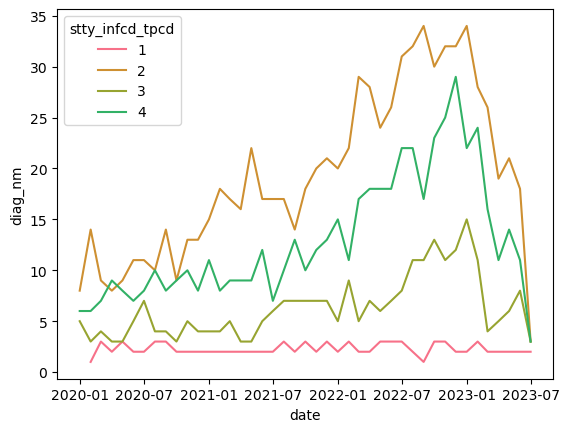

In [17]:
color = sns.color_palette("husl", 8)
sns.lineplot(df_count_clean, x = 'date', y='diag_nm', hue = 'stty_infcd_tpcd', palette=color)

#### 월별 법정 감염병 코드별 평균 앱내 보험 평균 횟수

C:\Users\c\AppData\Local\Temp\ipykernel_3464\3702721796.py:6: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(df_count_clean_a, x = 'date', y='diag_nm', hue = 'stty_infcd_tpcd', palette=color)


<Axes: xlabel='date', ylabel='diag_nm'>

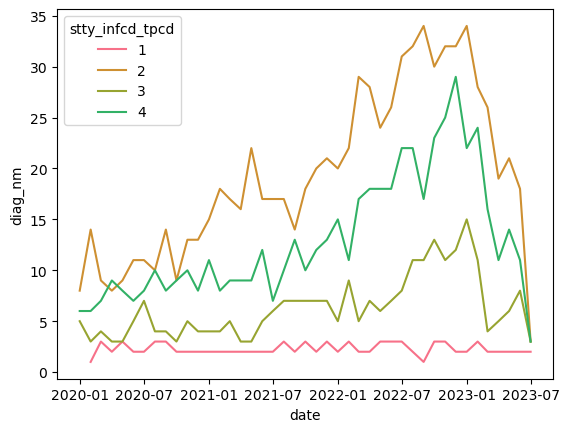

In [23]:
df_count_clean_a= df_count_clean.groupby(['date','stty_infcd_tpcd'])['diag_nm'].mean().reset_index()

df_count_clean_a

color = sns.color_palette("husl", 8)
sns.lineplot(df_count_clean_a, x = 'date', y='diag_nm', hue = 'stty_infcd_tpcd', palette=color)

### 시간에 따른 법정 감염병 코드별 앱내 전체 환자 수

C:\Users\c\AppData\Local\Temp\ipykernel_3464\3606415961.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(df_count_clean, x = 'date', y='whol_ptnt_cnt', hue = 'stty_infcd_tpcd', palette=color)


<Axes: xlabel='date', ylabel='whol_ptnt_cnt'>

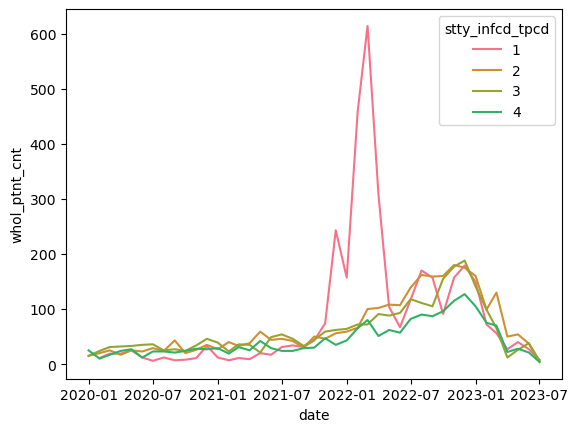

In [18]:
color = sns.color_palette("husl", 8)
sns.lineplot(df_count_clean, x = 'date', y='whol_ptnt_cnt', hue = 'stty_infcd_tpcd', palette=color)

### 시간에 따른 법정 감염병 코드별 앱내 입원 환자 수

C:\Users\c\AppData\Local\Temp\ipykernel_3464\3526466491.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(df_count_clean, x = 'date', y='adm_ptnt_cnt', hue = 'stty_infcd_tpcd', palette=color)


<Axes: xlabel='date', ylabel='adm_ptnt_cnt'>

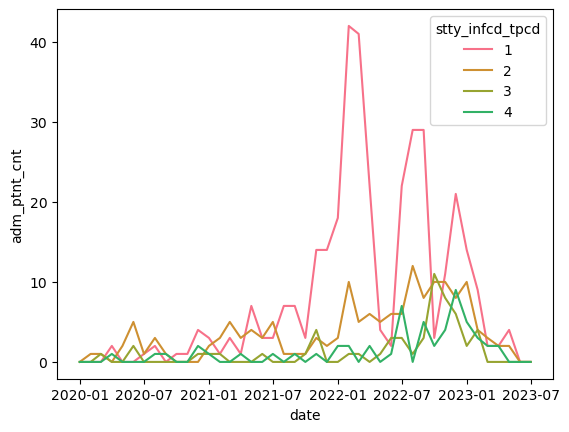

In [19]:
color = sns.color_palette("husl", 8)
sns.lineplot(df_count_clean, x = 'date', y='adm_ptnt_cnt', hue = 'stty_infcd_tpcd', palette=color)

In [22]:
con1 = df_count_clean['stty_infcd_tpcd'] ==1
con2 = df_count_clean['date'] == '2022-03-01'
con3 = df_count_clean['date'] == '2022-08-01'
con4 = df_count_clean['date'] == '2022-12-01'

df_count_clean_con =df_count_clean[con1&(con2 |con3|con4)]


df_count_clean_con['adm_ptnt_cnt']/df_count_clean_con['whol_ptnt_cnt']

103    0.066775
123    0.170588
139    0.117318
dtype: float64

### 시간에 따른 법정 감염병 코드별 앱내 입원 환자 비율

C:\Users\c\AppData\Local\Temp\ipykernel_3464\2713100140.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(df_count_clean, x = 'date', y='rate', hue = 'stty_infcd_tpcd', palette=color)


<Axes: xlabel='date', ylabel='rate'>

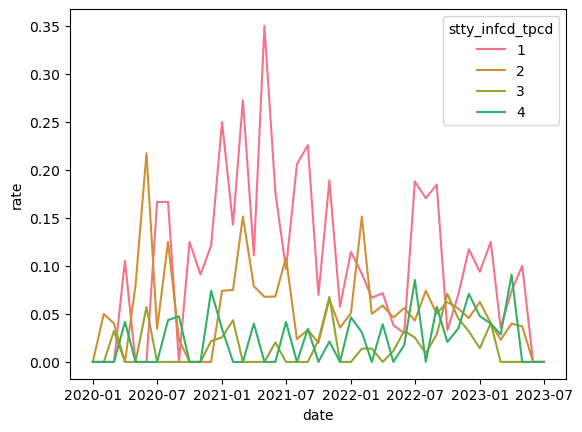

In [21]:
color = sns.color_palette("husl", 8)
sns.lineplot(df_count_clean, x = 'date', y='rate', hue = 'stty_infcd_tpcd', palette=color)

In [33]:
df_count_clean[df_count_clean['date']=='2022-02-01']

,date,stty_infcd_tpcd,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,rate
99,2022-02-01,1,3,458,42,0.091703
100,2022-02-01,2,22,66,10,0.151515
101,2022-02-01,3,9,72,1,0.013889
102,2022-02-01,4,11,65,2,0.030769


In [30]:
con1 =df['date']=='2020-06-01'
con2 =df['stty_infcd_tpcd']==2
df[con1&con2]

,sqno,strd_yr,stdmt,stty_infcd_tpcd,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,adm_ptnt_rate,strd_yr_o,stdmt_o,date
769,5374,2020,6,2,간성 혼수가 없는 A형간염,6,1,16.67,2020,6,2020-06-01
770,5375,2020,6,2,결핵성 장염(K93.0*),2,1,50.00,2020,6,2020-06-01
771,5376,2020,6,2,급성 및 아급성 감염성 심내막염,1,0,0.00,2020,6,2020-06-01
772,5377,2020,6,2,방광의 결핵(N33.0*),1,0,0.00,2020,6,2020-06-01
773,5378,2020,6,2,배양 유무에 관계없이 가래 현미경 검사로 확인된 공동이 있는 폐결핵,2,0,0.00,2020,6,2020-06-01
775,5379,2020,6,2,상세불명의 수단으로 확인된 공동이 없거나 상세불명의 폐결핵,3,0,0.00,2020,6,2020-06-01
776,5380,2020,6,2,세균학적 또는 조직학적 확인에 대한 언급이 없는 공동이 없거나 상세불명의 결핵성 흉막염,3,1,33.33,2020,6,2020-06-01
778,5382,2020,6,2,세균학적 및 조직학적으로 음성인 공동이 없거나 상세불명의 폐결핵,1,0,0.00,2020,6,2020-06-01
779,5383,2020,6,2,신장의 결핵(N29.1*),1,0,0.00,2020,6,2020-06-01
780,5384,2020,6,2,척추의 결핵(M49.0*),2,2,100.00,2020,6,2020-06-01


In [31]:
con1 =df['date']=='2022-02-01'
con2 =df['stty_infcd_tpcd']==2
df[con1&con2]

,sqno,strd_yr,stdmt,stty_infcd_tpcd,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,adm_ptnt_rate,strd_yr_o,stdmt_o,date
1199,6032,2022,2,2,간성 혼수가 없는 A형간염,8,3,37.50,2022,2,2022-02-01
1339,6033,2022,2,2,결핵성 말초림프절병증,1,0,0.00,2022,2,2022-02-01
1340,6034,2022,2,2,결핵성 복막염(K67.3*),1,0,0.00,2022,2,2022-02-01
1341,6035,2022,2,2,결핵성 수막뇌염(G05.0*),2,2,100.00,2022,2,2022-02-01
1342,6036,2022,2,2,결핵성 수막염(G01*),1,0,0.00,2022,2,2022-02-01
1343,6037,2022,2,2,결핵성 장염(K93.0*),9,0,0.00,2022,2,2022-02-01
1344,6038,2022,2,2,급성 및 아급성 감염성 심내막염,8,1,12.50,2022,2,2022-02-01
1345,6039,2022,2,2,급성 복막염,6,0,0.00,2022,2,2022-02-01
1346,6040,2022,2,2,배양 유무에 관계없이 가래 현미경 검사로 확인된 공동이 없거나 상세불명의 폐결핵,1,0,0.00,2022,2,2022-02-01
1347,6041,2022,2,2,배양만으로 확인된 공동이 없거나 상세불명의 폐결핵,2,0,0.00,2022,2,2022-02-01



### 그럼 세부 병명으로 가장 많이 사람들이 보험 급여를 신청한 병명은 무엇일까

In [34]:
pd.DataFrame(df[['stty_infcd_tpcd', 'diag_nm']].value_counts()).head(10)

0
stty_infcd_tpcd diag_nm                                               
3               만성 바이러스C형간염                                         43
4               다른 장에서 분류된 질환의 원인으로서의 유두종바이러스                       43
3               상세불명의 사람면역결핍바이러스병                                   43
1               바이러스가 확인된 코로나바이러스 질환 2019 [바이러스가 확인된 코로나-19]        42
2               상세불명의 수단으로 확인된 공동이 없거나 상세불명의 폐결핵                    41
                급성 및 아급성 감염성 심내막염                                   41
4               항문생식기의(성병성) 사마귀                                     40
1               바이러스가 확인되지 않은 코로나바이러스 질환 2019 [바이러스가 확인되지 않은 코로...  39
2               간성 혼수가 없는 A형간염                                      39
                급성 복막염                                              38

In [36]:
#1급 감염병을 제외한 top10
con1 = df['stty_infcd_tpcd'] ==1
df_234 = df[~con1]

df_234_10 = pd.DataFrame(df_234[['stty_infcd_tpcd', 'diag_nm']].value_counts()).head(10).reset_index()
df_234_10

,stty_infcd_tpcd,diag_nm,0
0,3,만성 바이러스C형간염,43
1,3,상세불명의 사람면역결핍바이러스병,43
2,4,다른 장에서 분류된 질환의 원인으로서의 유두종바이러스,43
3,2,상세불명의 수단으로 확인된 공동이 없거나 상세불명의 폐결핵,41
4,2,급성 및 아급성 감염성 심내막염,41
5,4,항문생식기의(성병성) 사마귀,40
6,2,간성 혼수가 없는 A형간염,39
7,2,급성 복막염,38
8,2,세균학적 또는 조직학적 확인에 대한 언급이 없는 공동이 없거나 상세불명의 폐결핵,38
9,4,"바이러스가 확인되지 않은, 기타 호흡기증상을 동반한 인플루엔자",35


In [37]:
df_234_10_list= df_234_10.reset_index()['diag_nm'].tolist()
df_234_10_list

['만성 바이러스C형간염',
 '상세불명의 사람면역결핍바이러스병',
 '다른 장에서 분류된 질환의 원인으로서의 유두종바이러스',
 '상세불명의 수단으로 확인된 공동이 없거나 상세불명의 폐결핵',
 '급성 및 아급성 감염성 심내막염',
 '항문생식기의(성병성) 사마귀',
 '간성 혼수가 없는 A형간염',
 '급성 복막염',
 '세균학적 또는 조직학적 확인에 대한 언급이 없는 공동이 없거나 상세불명의 폐결핵',
 '바이러스가 확인되지 않은, 기타 호흡기증상을 동반한 인플루엔자']

### 각 감염병별 전체 기간 내의 감염환자와 입원 환자와 입원 환자 비율 확인

In [39]:

df_10_ptnt = df[df['diag_nm'].isin(df_234_10_list)].groupby('diag_nm')[['whol_ptnt_cnt', 'adm_ptnt_cnt']].sum().reset_index()
df_10_ptnt['rate'] = df_10_ptnt['adm_ptnt_cnt']/df_10_ptnt['whol_ptnt_cnt']
df_10_ptnt = df_10_ptnt.sort_values(by='rate', ascending=False)
df_10_ptnt

,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,rate
0,간성 혼수가 없는 A형간염,141,30,0.212766
1,급성 및 아급성 감염성 심내막염,246,17,0.069106
2,급성 복막염,441,26,0.058957
7,상세불명의 수단으로 확인된 공동이 없거나 상세불명의 폐결핵,161,7,0.043478
8,세균학적 또는 조직학적 확인에 대한 언급이 없는 공동이 없거나 상세불명의 폐결핵,311,13,0.041801
5,"바이러스가 확인되지 않은, 기타 호흡기증상을 동반한 인플루엔자",144,3,0.020833
4,만성 바이러스C형간염,1410,17,0.012057
6,상세불명의 사람면역결핍바이러스병,776,9,0.011598
3,다른 장에서 분류된 질환의 원인으로서의 유두종바이러스,629,7,0.011129
9,항문생식기의(성병성) 사마귀,247,0,0.000000


### 입원 환자 비율이 0.5를 넘는 감염병 확인

In [40]:
df_ptnt = df.groupby('diag_nm')[['whol_ptnt_cnt', 'adm_ptnt_cnt']].sum().reset_index()
df_ptnt['rate'] = df_ptnt['adm_ptnt_cnt']/df_ptnt['whol_ptnt_cnt']
df_ptnt = df_ptnt.sort_values(by='rate', ascending=False)

con1 = df_ptnt['rate']>=0.50
df_ptnt_50_list = df_ptnt[con1]['diag_nm'].tolist()
df_ptnt[con1]

,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,rate
99,세균학적 또는 조직학적 확인에 대한 언급이 없는 공동이 없거나 상세불명의 흉곽내림프...,1,1,1.0
108,세균학적 및 조직학적으로 확인된 결핵성 흉막염,1,1,1.0
113,세균학적 및 조직학적으로 확인된 공동이 없거나 상세불명의 흉곽내림프절의 결핵,1,1,1.0
84,상세불명의 수단으로 확인된 폐결핵,1,1,1.0
140,중증열성혈소판감소증후군 [SFTS],8,4,0.5
35,기타 합병증을 동반한 삼일열원충말라리아,4,2,0.5
114,세균학적 및 조직학적으로 확인된 공동이 있는 결핵성 흉막염,2,1,0.5
94,세균학적 또는 조직학적 확인에 대한 언급이 없는 공동이 없거나 상세불명의 기타 호흡기결핵,10,5,0.5
49,달리 분류된 바이러스질환에서의 수막염,2,1,0.5
145,크로이츠펠트-야콥병,2,1,0.5


In [41]:
df[df['diag_nm'].isin(df_ptnt_50_list)].groupby('stty_infcd_tpcd')['stty_infcd_tpcd'].count()

stty_infcd_tpcd
2    11
3     8
4     2
Name: stty_infcd_tpcd, dtype: int64

### 다시 보험 청구 횟수가 많은 질환들을 통해서 전체 감염 환자수와 입원 환자수, 입원환자수 비율을 확인

In [42]:
df_10_ptnt = df_10_ptnt.sort_values(by='diag_nm')
df_234_10 = df_234_10.sort_values(by='diag_nm')
pd.merge(df_10_ptnt, df_234_10, on = 'diag_nm', how = 'left').sort_values(by=0, ascending=False)

,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,rate,stty_infcd_tpcd,0
3,다른 장에서 분류된 질환의 원인으로서의 유두종바이러스,629,7,0.011129,4,43
4,만성 바이러스C형간염,1410,17,0.012057,3,43
6,상세불명의 사람면역결핍바이러스병,776,9,0.011598,3,43
1,급성 및 아급성 감염성 심내막염,246,17,0.069106,2,41
7,상세불명의 수단으로 확인된 공동이 없거나 상세불명의 폐결핵,161,7,0.043478,2,41
9,항문생식기의(성병성) 사마귀,247,0,0.000000,4,40
0,간성 혼수가 없는 A형간염,141,30,0.212766,2,39
2,급성 복막염,441,26,0.058957,2,38
8,세균학적 또는 조직학적 확인에 대한 언급이 없는 공동이 없거나 상세불명의 폐결핵,311,13,0.041801,2,38
5,"바이러스가 확인되지 않은, 기타 호흡기증상을 동반한 인플루엔자",144,3,0.020833,4,35


In [47]:
#간성 혼수가 없는 A형간염 전체 데이터 확인
df___ = df[df['diag_nm'] == '간성 혼수가 없는 A형간염'].groupby(['date'])[['whol_ptnt_cnt','adm_ptnt_cnt']].sum()
df___

,whol_ptnt_cnt,adm_ptnt_cnt
date,,
2020-01-01,2,0
2020-02-01,3,1
2020-03-01,3,0
2020-04-01,4,0
2020-05-01,7,2
2020-06-01,6,1
2020-07-01,5,0
2020-08-01,6,2
2020-09-01,2,0


C:\Users\c\AppData\Local\Temp\ipykernel_3464\2887388440.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.lineplot(df___, palette=color)


<Axes: xlabel='date'>

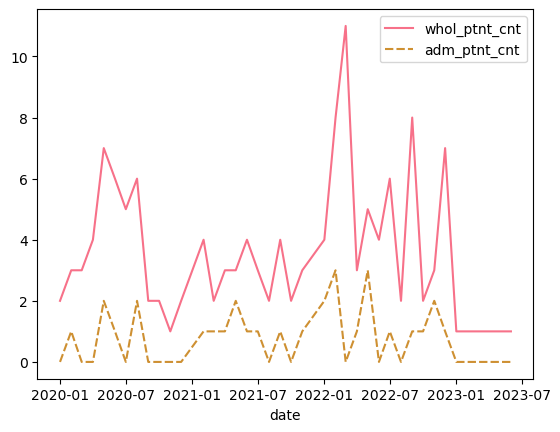

In [48]:
color = sns.color_palette("husl", 8)
sns.lineplot(df___, palette=color)

### 세부 병명별로 전체 환자가 높은  TOP 10의 전체 환자수와 입원 환자수 그리고 입원환자수 비율을 확인


In [49]:
con1 = df['stty_infcd_tpcd'] ==1
df_234 = df[~con1]



df_234_whol= df_234.groupby(['stty_infcd_tpcd', 'diag_nm'])[['whol_ptnt_cnt', 'adm_ptnt_cnt']].sum().reset_index().sort_values(by='whol_ptnt_cnt', ascending=False).head(10)
df_234_whol['rate']=df_234_whol['adm_ptnt_cnt']/df_234_whol['whol_ptnt_cnt']
df_234_whol

,stty_infcd_tpcd,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,rate
88,3,만성 바이러스C형간염,1410,17,0.012057
95,3,상세불명의 사람면역결핍바이러스병,776,9,0.011598
119,4,다른 장에서 분류된 질환의 원인으로서의 유두종바이러스,629,7,0.011129
8,2,급성 복막염,441,26,0.058957
33,2,세균학적 또는 조직학적 확인에 대한 언급이 없는 공동이 없거나 상세불명의 폐결핵,311,13,0.041801
160,4,항문생식기의(성병성) 사마귀,247,0,0.000000
7,2,급성 및 아급성 감염성 심내막염,246,17,0.069106
25,2,상세불명의 수단으로 확인된 공동이 없거나 상세불명의 폐결핵,161,7,0.043478
1,2,결핵성 말초림프절병증,144,2,0.013889
129,4,"바이러스가 확인되지 않은, 기타 호흡기증상을 동반한 인플루엔자",144,3,0.020833


### 세부 병명별로 입원 환자가 높은 TOP 10의 전체 환자수와 입원 환자수 그리고 입원환자수 비율을 확인

In [50]:
con1 = df['stty_infcd_tpcd'] ==1
df_234 = df[~con1]



df_234_adm= df_234.groupby(['stty_infcd_tpcd', 'diag_nm'])[['whol_ptnt_cnt', 'adm_ptnt_cnt']].sum().reset_index().sort_values(by='adm_ptnt_cnt', ascending=False).head(10)
df_234_adm['rate']=df_234_adm['adm_ptnt_cnt']/df_234_adm['whol_ptnt_cnt']
df_234_adm

,stty_infcd_tpcd,diag_nm,whol_ptnt_cnt,adm_ptnt_cnt,rate
0,2,간성 혼수가 없는 A형간염,141,30,0.212766
8,2,급성 복막염,441,26,0.058957
7,2,급성 및 아급성 감염성 심내막염,246,17,0.069106
88,3,만성 바이러스C형간염,1410,17,0.012057
33,2,세균학적 또는 조직학적 확인에 대한 언급이 없는 공동이 없거나 상세불명의 폐결핵,311,13,0.041801
86,3,리케차 쯔쯔가무시에 의한 발진티푸스,54,12,0.222222
150,4,캄필로박터장염,27,12,0.444444
95,3,상세불명의 사람면역결핍바이러스병,776,9,0.011598
73,3,간성 혼수가 없고 델타-병원체도 없는 급성 B형간염,105,9,0.085714
25,2,상세불명의 수단으로 확인된 공동이 없거나 상세불명의 폐결핵,161,7,0.043478


In [51]:
df_1 = df[df['diag_nm'] == '캄필로박터장염'].groupby(['date'])[['whol_ptnt_cnt','adm_ptnt_cnt']].sum().reset_index()
df_1

,date,whol_ptnt_cnt,adm_ptnt_cnt
0,2020-04-01,1,1
1,2020-08-01,2,1
2,2021-11-01,1,0
3,2021-12-01,1,0
4,2022-01-01,2,2
5,2022-06-01,2,1
6,2022-07-01,6,3
7,2022-08-01,1,0
8,2022-09-01,4,3
9,2022-12-01,1,0


C:\Users\c\AppData\Local\Temp\ipykernel_3464\3456298180.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.lineplot(df_1,  palette=color)


<Axes: >

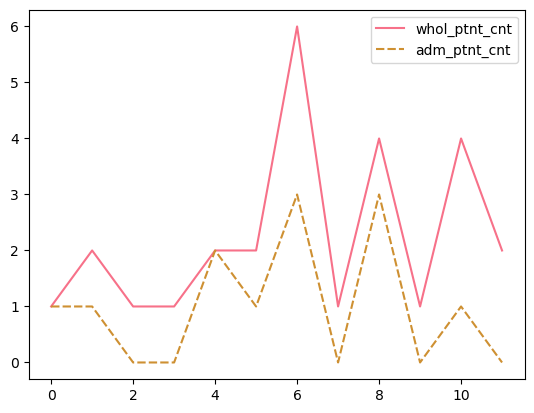

In [52]:
color = sns.color_palette("husl", 8)
sns.lineplot(df_1,  palette=color)

In [53]:
df_2 = df[df['diag_nm'] == '리케차 쯔쯔가무시에 의한 발진티푸스'].groupby(['date'])[['whol_ptnt_cnt','adm_ptnt_cnt']].sum().reset_index()
df_2

,date,whol_ptnt_cnt,adm_ptnt_cnt
0,2021-11-01,7,4
1,2021-12-01,4,0
2,2022-01-01,1,0
3,2022-02-01,1,0
4,2022-06-01,1,0
5,2022-08-01,1,0
6,2022-10-01,12,5
7,2022-11-01,25,3
8,2023-01-01,2,0


C:\Users\c\AppData\Local\Temp\ipykernel_3464\1484770033.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.lineplot(df_2, palette=color)


<Axes: >

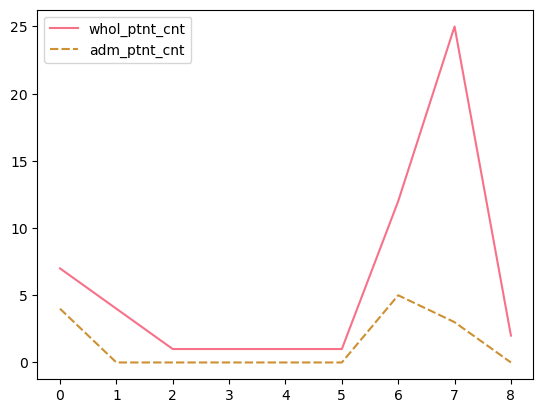

In [54]:
color = sns.color_palette("husl", 8)
sns.lineplot(df_2, palette=color)